# Question 3

In this exercise, use the 311 dataset.

You also need to read back the PLUTO dataset from Cloud Object Store that you saved previously in the course. Use the PLUTO dataset for the borough that you already identified to focus on the last exercise.Ensure that you use only a limited number of fields from the dataset so that you are not consuming too much memory during your analysis.

The recommended fields are Address, BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, NumBldgs, NumFloors, OfficeArea, ResArea, ResidFAR, RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, and XCoord.

At the end of this exercise, you should determine whether the type of complaint that you have identified as the response to Question 1 has an obvious relationship with any particular characteristic or characteristics of the houses.

Add your answer to this question along with code and comments in a separate notebook. Upload the notebook in the subsection called "Question 3 - Does the Complaint Type, that you identified in response to Question 1, have an obvious relationship with any particular characteristic(s) of the Houses?" in the section "Submit your work and Review your Peer's work" in the module "Submit Your Work and Grade Your Peers".

**STEP 1 - IMPORT REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

**STEP 2 - LOAD FILES**

In [2]:
df_Bronx = pd.read_csv("PLUTO_for_WEB/BX_18v1.csv")

/Users/nando/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nyc_data_pre = pd.read_csv("nyc_data_pre.csv")

**STEP 3 - DATA PRE-PROCESSING**

In [4]:
df_Bronx = df_Bronx[["Address", "BldgArea","BldgDepth", "BuiltFAR", "CommFAR", "FacilFAR", "Lot", "LotArea", 
                        "LotDepth", "NumBldgs", "NumFloors", "OfficeArea", "ResArea", "ResidFAR", "RetailArea", 
                        "YearBuilt", "YearAlter1", "ZipCode", "YCoord", "XCoord"]]

In [78]:
df_Bronx["BuiltFAR"].value_counts()

0.00     3576
1.00     1591
0.70      935
0.80      899
0.99      899
         ... 
6.83        1
8.56        1
10.84       1
11.86       1
7.90        1
Name: BuiltFAR, Length: 771, dtype: int64

In [5]:
# Check missing data in the file
missing_data = df_Bronx.isnull()

for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

False    89785
True        69
Name: Address, dtype: int64

False    89854
Name: BldgArea, dtype: int64

False    89854
Name: BldgDepth, dtype: int64

False    89854
Name: BuiltFAR, dtype: int64

False    89854
Name: CommFAR, dtype: int64

False    89854
Name: FacilFAR, dtype: int64

False    89854
Name: Lot, dtype: int64

False    89854
Name: LotArea, dtype: int64

False    89854
Name: LotDepth, dtype: int64

False    89854
Name: NumBldgs, dtype: int64

False    89854
Name: NumFloors, dtype: int64

False    89854
Name: OfficeArea, dtype: int64

False    89854
Name: ResArea, dtype: int64

False    89854
Name: ResidFAR, dtype: int64

False    89854
Name: RetailArea, dtype: int64

False    89854
Name: YearBuilt, dtype: int64

False    89854
Name: YearAlter1, dtype: int64

False    89525
True       329
Name: ZipCode, dtype: int64

False    86595
True      3259
Name: YCoord, dtype: int64

False    86595
True      3259
Name: XCoord, dtype: int64



In [6]:
# Remove rows with missing information for "Address", "ZipCode", "YCoord" and "XCoord"
print("Initial shape before removing the rows:",df_Bronx.shape)

df_Bronx.dropna(subset=["Address"], axis=0, inplace=True)
df_Bronx.dropna(subset=["ZipCode"], axis=0, inplace=True)
df_Bronx.dropna(subset=["YCoord"], axis=0, inplace=True)
df_Bronx.dropna(subset=["XCoord"], axis=0, inplace=True)

Initial shape before removing the rows: (89854, 20)


In [7]:
# Reset index values with the new rows
df_Bronx.reset_index(drop=True, inplace=True)
print("New shape after removing the rows:",df_Bronx.shape)

New shape after removing the rows: (86591, 20)


In [8]:
# Get dataframe from the NYC data for heating complaints in Bronx
df_heating = nyc_data_pre.loc[(nyc_data_pre['Complaint Type'] == "HEATING")]
df_heating = df_heating.reset_index(drop=True)

In [9]:
# Get the values where the address appears in the dataframe for Bronx
df_Bronx["Target"] = df_Bronx[['Address']].isin(df_heating['Incident Address'].unique())

In [10]:
df_Bronx = df_Bronx.reset_index(drop=True)

In [11]:
df_Bronx["Target"] = (df_Bronx["Target"])*1

In [12]:
df_Bronx

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,Target
0,122 BRUCKNER BOULEVARD,0,0.00,0.00,5.0,6.5,1,15000,200.00,1,...,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,0
1,126 BRUCKNER BOULEVARD,752,16.00,0.05,5.0,6.5,4,13770,100.00,2,...,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,0
2,138 BRUCKNER BOULEVARD,39375,200.00,1.13,5.0,6.5,10,35000,200.00,1,...,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,0
3,144 BRUCKNER BOULEVARD,12500,85.00,5.00,5.0,6.5,17,2500,100.00,1,...,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,1
4,148 BRUCKNER BOULEVARD,8595,70.00,4.58,5.0,6.5,18,1875,75.00,1,...,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86586,6007 RIVERDALE AVENUE,1044,29.00,0.55,0.0,2.0,877,1900,76.00,1,...,0,1044,0.90,0,1910,0,10471.0,270401.0,1010815.0,0
86587,6301 RIVERDALE AVENUE,237021,35.00,0.13,0.0,2.0,1,1845000,2000.00,20,...,0,0,0.90,0,1848,2006,10471.0,272155.0,1009436.0,0
86588,755 WEST 261 STREET,83366,121.75,0.32,0.0,2.0,10,257775,235.25,2,...,0,0,0.90,0,1956,0,10471.0,271393.0,1010271.0,0
86589,755 RIVERDALE AVENUE,0,0.00,0.00,0.0,2.0,43,14749,439.17,0,...,0,0,0.90,0,0,0,10471.0,272036.0,1010935.0,0


**STEP 4 - DATA ANALYSIS**  
**Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?**

**Now we have a dataframe df_Bronx where we have the heating complaint types occured only in the Bronx borough during the last decade**

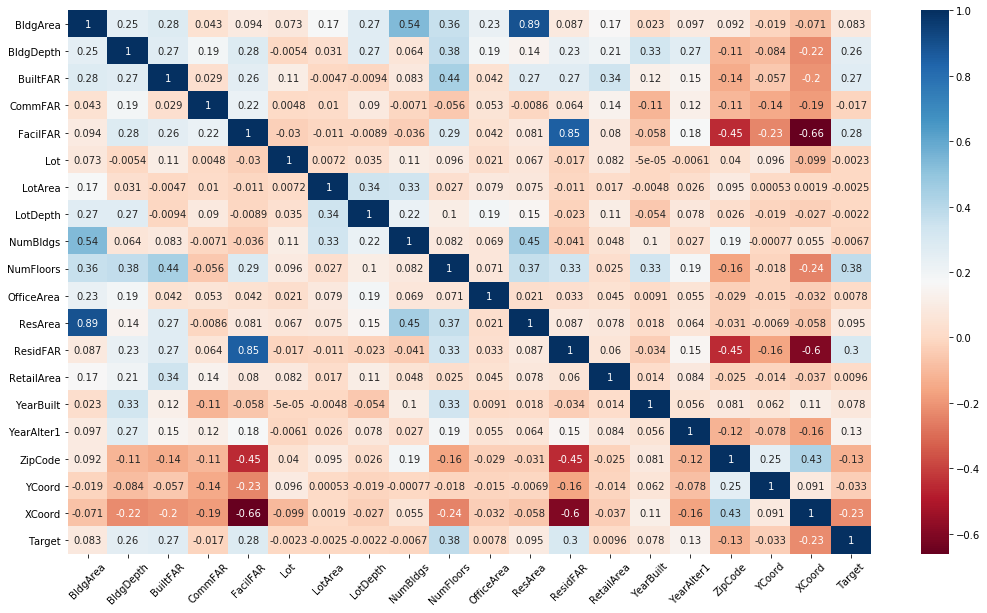

In [21]:
# Using Pearson correlation
plt.figure(figsize=(18,10))

sns.heatmap(df_Bronx.corr(), annot = True, cmap="RdBu")

plt.xticks(rotation=45)

plt.show()

In [80]:
#Correlation with output variable
cor_target = abs(df_Bronx.corr()[["Target"]])

#Selecting highly correlated features. Here I set the threshold to be 0.12
relevant_features = cor_target["Target"][cor_target["Target"]>0.25]
relevant_features

BldgDepth    0.259828
BuiltFAR     0.269632
FacilFAR     0.280709
NumFloors    0.379984
ResidFAR     0.300051
Target       1.000000
Name: Target, dtype: float64

**STEP 5 - CONCLUSIONS**

After analyzing the 311 dataset and the PLUTO dataset for Bronx, which is the most impacted bourough as we saw in Question 2, we can conclude that the next house characteristics have a relation with the heating complaints in Bronx:  

    1 - Building depth  
    2 - Built far  
    3 - Facil far  
    4 - Number of floors  
    5 - Resid far  